In [56]:
# Import pandas and numpy

import numpy as np 
import pandas as pd

# Import matplotlib and seaborn for plotting and to specify that graphs should be plotted inline

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Import libraries to generate models
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

# Type it in the first cell of your notebook, then your matplotlib plots will be included next to your codes. 
# Otherwise, include plt.show()

pd.set_option('display.max_rows', None)


In [57]:
# Read the csv file to store it under the name df

df=pd.read_csv("online_shoppers_intention.csv")

In [58]:
# Data Preprocessing

print(df.shape)

(12330, 18)


In [59]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [60]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [61]:
# Understand the data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [62]:
# Transform the data type of below mentioned features to object

df["OperatingSystems"] = df["OperatingSystems"].astype(object)
df["Browser"] = df["Browser"].astype(object)
df["Region"] = df["Region"].astype(object)
df["TrafficType"] = df["TrafficType"].astype(object)

In [63]:
#checking for null values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Text(0, 0.5, 'Count')

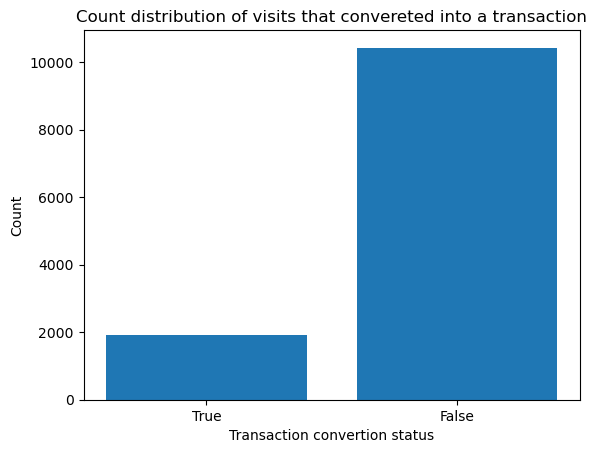

In [64]:
#Univariate data analysis
#Revenue- Class label indicating whether the visit has been finalized with a transaction
true_count = df['Revenue'].sum()
false_count = len(df) - true_count
plt.bar(['True', 'False'], [true_count, false_count])
plt.title('Count distribution of visits that convereted into a transaction')
plt.xlabel('Transaction convertion status')
plt.ylabel('Count')

In [65]:
# Count of each Visitor type as ‘‘New Visitor,’’ ‘‘Returning Visitor,’’ and ‘‘Other’’
vis_count=df['VisitorType'].value_counts()
print(vis_count)

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64


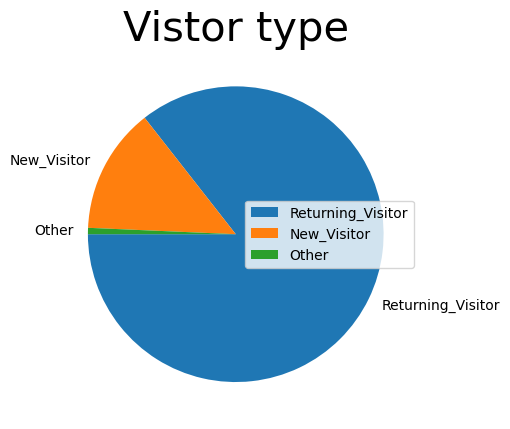

In [66]:
plt.pie(vis_count, labels=vis_count.index, startangle=180)
plt.title('Vistor type', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: count, dtype: int64


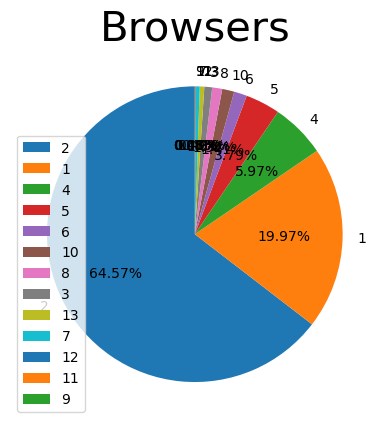

In [67]:
#Browser of the visitor
browser_count=df['Browser'].value_counts()
print(browser_count)
plt.pie(browser_count, labels=browser_count.index,autopct = '%.2f%%', startangle=90)
plt.title('Browsers', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: count, dtype: int64


([<matplotlib.axis.XTick at 0x15621d110>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

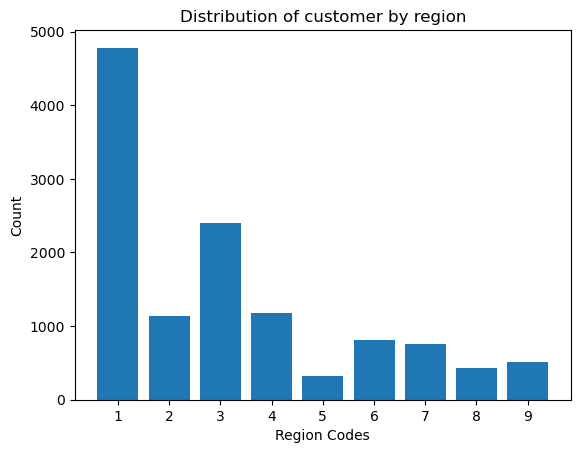

In [68]:
#Region- Geographic region from which the session has been started by the visitor
region_count=df['Region'].value_counts()
print(region_count)
bins = np.arange(df['Region'].min() - 0.5, df['Region'].max() + 1.5, 1)
plt.hist(df['Region'],bins=bins,rwidth=0.8)
plt.title('Distribution of customer by region')
plt.xlabel('Region Codes')
plt.ylabel('Count')
plt.xticks(np.arange(1, 10, 1)) 

TrafficType
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: count, dtype: int64


([<matplotlib.axis.XTick at 0x15548fc90>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

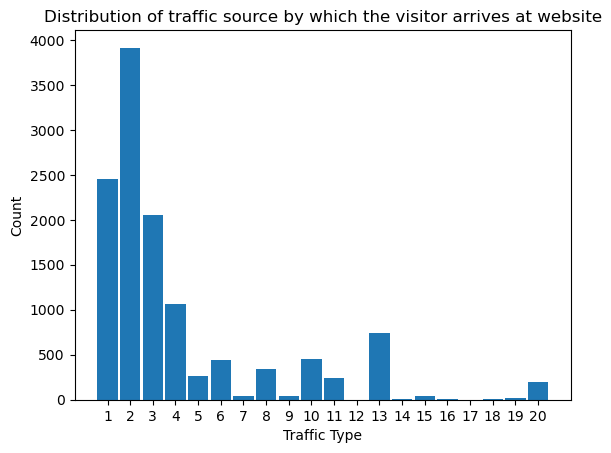

In [69]:
#TrafficType-Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct)
traffic_count=df['TrafficType'].value_counts()
print(traffic_count)
bins = np.arange(df['TrafficType'].min() - 0.5, df['TrafficType'].max() + 1.5, 1)
plt.hist(df['TrafficType'],bins=bins,rwidth=0.9)
plt.title('Distribution of traffic source by which the visitor arrives at website')
plt.xlabel('Traffic Type')
plt.ylabel('Count')
plt.xticks(np.arange(1, 21, 1))

In [70]:
#Os-Operating system of the visitor
Os_count=df['OperatingSystems'].value_counts()
print(Os_count)

OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: count, dtype: int64


Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64


Text(0.5, 1.0, 'Monthwise visits count')

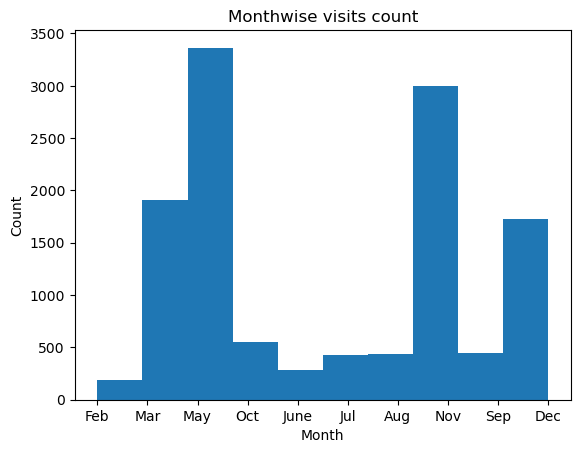

In [71]:
#Month-Month value of the visit date
Month_count= df['Month'].value_counts()
print(Month_count)
#Printing the histogram to view the month with max visits
plt.hist(df['Month'])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthwise visits count')

Revenue  False  True 
Weekend              
False     8053   1409
True      2369    499


Text(0.5, 1.0, 'Count of Revenue vs. Weekend')

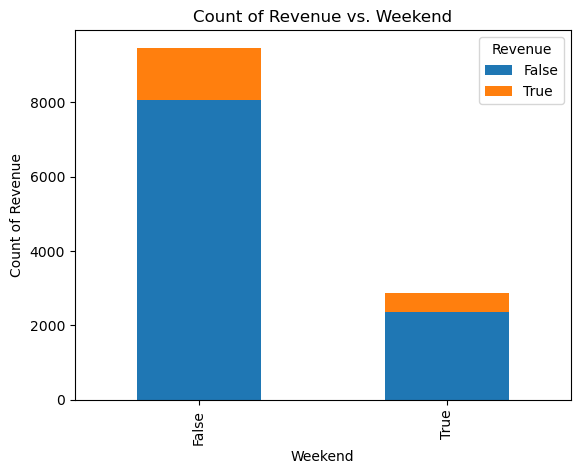

In [72]:
#Bivariate analysis
# Group by 'Weekend' and count the occurrences of revenue
revenue_count = df.groupby(['Weekend', 'Revenue']).size().unstack()
print(revenue_count)
# Plotting the graph
revenue_count.plot(kind='bar', stacked=True)
plt.xlabel('Weekend')
plt.ylabel('Count of Revenue')
plt.title('Count of Revenue vs. Weekend')

In [73]:
revenue_count.loc[False,False] = revenue_count.loc[False,False]/5
revenue_count.loc[False,True] = revenue_count.loc[False,True]/5
revenue_count.loc[True,False] = revenue_count.loc[True,False]/2
revenue_count.loc[True,True] = revenue_count.loc[True,True]/2

Revenue   False  True 
Weekend               
False    1610.6  281.8
True     1184.5  249.5


Text(0.5, 1.0, 'Count of Revenue vs. Weekend')

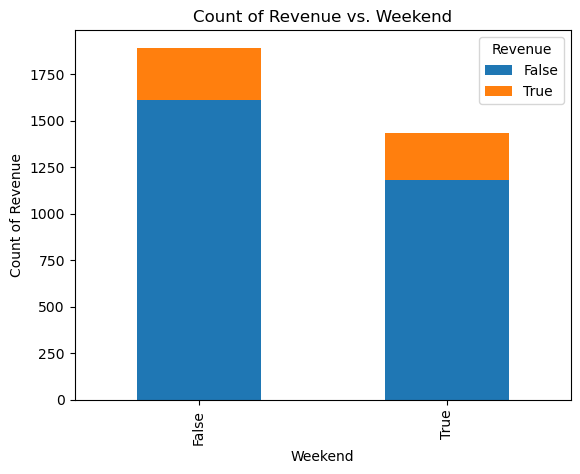

In [74]:
print(revenue_count)
# Plotting the graph
revenue_count.plot(kind='bar', stacked=True)
plt.xlabel('Weekend')
plt.ylabel('Count of Revenue')
plt.title('Count of Revenue vs. Weekend')

In [75]:
249.5/1184.5

0.21063739974672857

In [76]:
281.8/1610.6

0.1749658512355644

Text(0.5, 1.0, 'Count of Revenue vs. TrafficType')

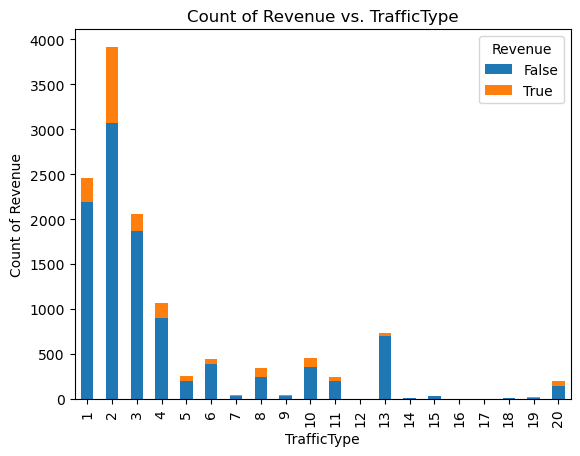

In [77]:
# Group by 'TrafficType' and count the occurrences of revenue
traffic_type_count = df.groupby(['TrafficType', 'Revenue']).size().unstack()
# Plotting the graph
traffic_type_count.plot(kind='bar', stacked=True)
plt.xlabel('TrafficType')
plt.ylabel('Count of Revenue')
plt.title('Count of Revenue vs. TrafficType')

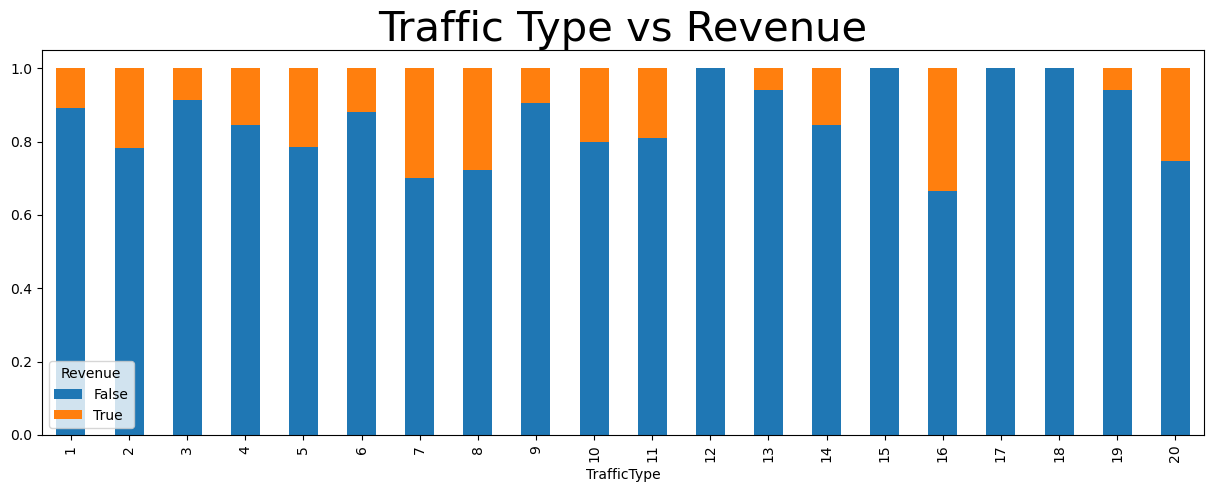

In [78]:
#Normalised for easy visualisation
df2 = pd.crosstab(df['TrafficType'], df['Revenue'])
df2.div(df2.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5))
plt.title('Traffic Type vs Revenue', fontsize = 30)
plt.show()

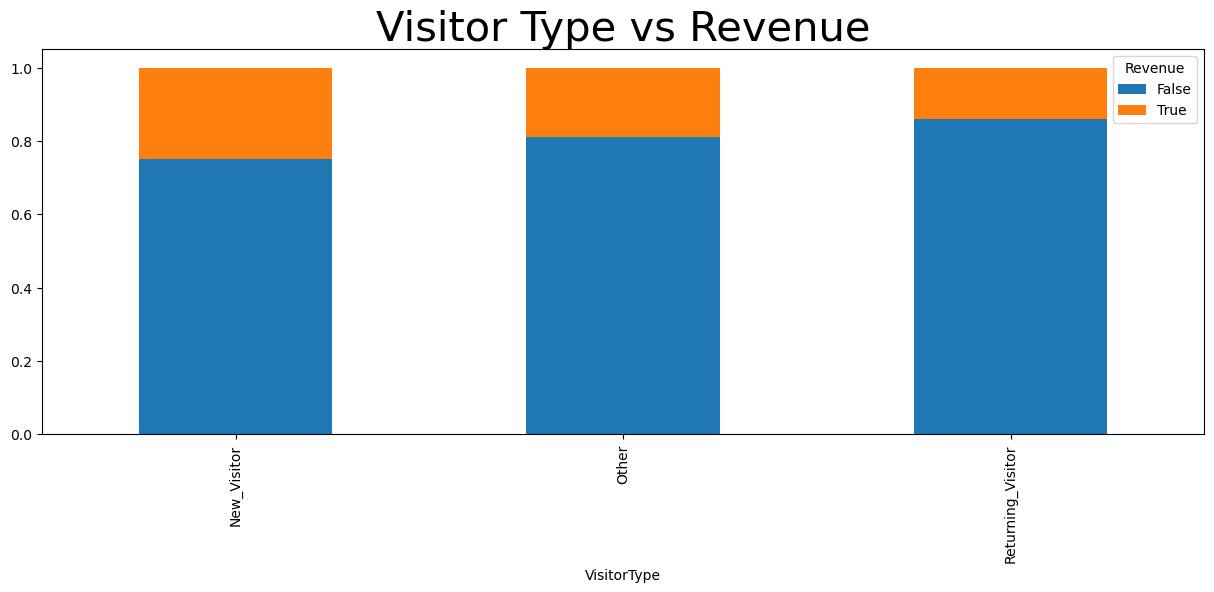

In [79]:
df3 = pd.crosstab(df['VisitorType'], df['Revenue'])
df3.div(df3.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5))
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.show()

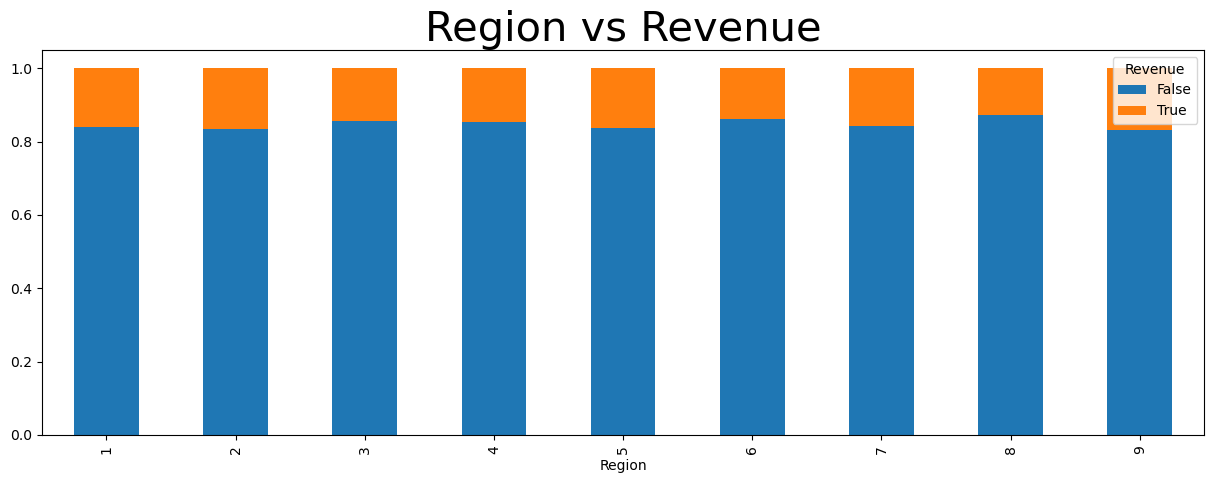

In [80]:
df4 = pd.crosstab(df['Region'], df['Revenue'])
df4.div(df4.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5))
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

In [81]:
# Correlation matrix
var = data.columns #['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF']


my_corr_matrix = data.corr(numeric_only=True)

#my_corr_matrix

<Axes: >

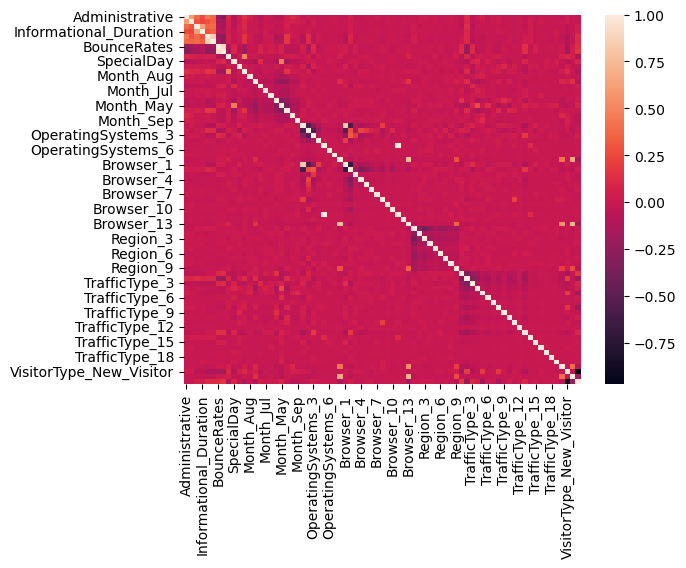

In [82]:
# plot a heatmap for the correlation matrix

sns.heatmap(my_corr_matrix )

In [83]:
s = my_corr_matrix.unstack()
so = s.sort_values(kind="quicksort")
print(so)

VisitorType_Returning_Visitor  VisitorType_New_Visitor         -0.971911
VisitorType_New_Visitor        VisitorType_Returning_Visitor   -0.971911
Browser_2                      Browser_1                       -0.674252
Browser_1                      Browser_2                       -0.674252
Browser_2                      OperatingSystems_1              -0.578602
OperatingSystems_1             Browser_2                       -0.578602
                               OperatingSystems_2              -0.552847
OperatingSystems_2             OperatingSystems_1              -0.552847
OperatingSystems_3             OperatingSystems_2              -0.548785
OperatingSystems_2             OperatingSystems_3              -0.548785
Browser_1                      OperatingSystems_2              -0.529652
OperatingSystems_2             Browser_1                       -0.529652
Region_3                       Region_1                        -0.391479
Region_1                       Region_3            

In [84]:
# Use MinMax scaler to scale numeric columns

df_scaled=df.copy()
scaler = MinMaxScaler()
scaled_col = ['Administrative','Administrative_Duration','Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
df_scaled[scaled_col] = MinMaxScaler().fit_transform(df_scaled[scaled_col])
df_scaled.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.000000,0.0,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.000000,0.0,0.0,0.0,0.002837,0.001000,0.000000,0.500000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.000000,0.0,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.000000,0.0,0.0,0.0,0.002837,0.000042,0.250000,0.700000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.000000,0.0,0.0,0.0,0.014184,0.009809,0.100000,0.250000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.000000,0.0,0.0,0.0,0.026950,0.002411,0.078947,0.122807,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0.000000,0.0,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,0.037037,0.0,0.0,0.0,0.000000,0.000000,1.000000,1.000000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0.000000,0.0,0.0,0.0,0.002837,0.000578,0.000000,0.500000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0.000000,0.0,0.0,0.0,0.004255,0.011536,0.000000,0.111111,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [85]:
# Set target variable
y=df_scaled['Revenue']

# Transform the categorical variables into dummies or indicator variables

data = pd.get_dummies(df_scaled)
x_data=data.drop(['Revenue'], axis = 1)

# Split the data

x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.3, random_state = 0)

# verify the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 74)
Shape of y_train : (8631,)
Shape of x_test : (3699, 74)
Shape of y_test : (3699,)


In [86]:
# Assuming X_train and y_train are your feature matrix and target variable respectively
# X_train.shape = (n_samples, n_features)
# y_train.shape = (n_samples,)
 
# Instantiate the RandomOverSampler
ros = RandomOverSampler(random_state=42)
 
# Resample the training data
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
 
# Check the shape of the resampled train data
print("Shape of resampled dataset:", x_train_resampled.shape, y_train_resampled.shape)
print("Shape of x_train_resampled:", x_train_resampled.shape)

Shape of resampled dataset: (14690, 74) (14690,)
Shape of x_train_resampled: (14690, 74)


In [87]:
# Logistic Regression
# Define function
logreg = LogisticRegression(penalty='l2', random_state=42, max_iter=10000)

# Train the classifier
logreg.fit(x_train_resampled, y_train_resampled)

# Predict target variable and the probability
y_pred_logreg=logreg.predict(x_test)
pred_prob = logreg.predict_proba(x_test)[:,1]

# Print train, test accuarcay and area under the curve score
print('Accuracy of logistic regression classifier on train set: ', logreg.score(x_train_resampled, y_train_resampled))
print('Accuracy of logistic regression classifier on test set: ', logreg.score(x_test, y_test))
print("AUC for logistic regression:", roc_auc_score(y_test, pred_prob))


Accuracy of logistic regression classifier on train set:  0.8120490129339687
Accuracy of logistic regression classifier on test set:  0.8142741281427412
AUC for logistic regression: 0.8817118398406599


In [88]:
# Evaluate confusion matrix
my_matrix_logreg = confusion_matrix(y_test, y_pred_logreg) 
print("TP is:", my_matrix_logreg[1,1])
print("TN is:", my_matrix_logreg[0,0])
print("FP is:", my_matrix_logreg[0,1])
print("FN is:", my_matrix_logreg[1,0])


TP is: 478
TN is: 2534
FP is: 543
FN is: 144


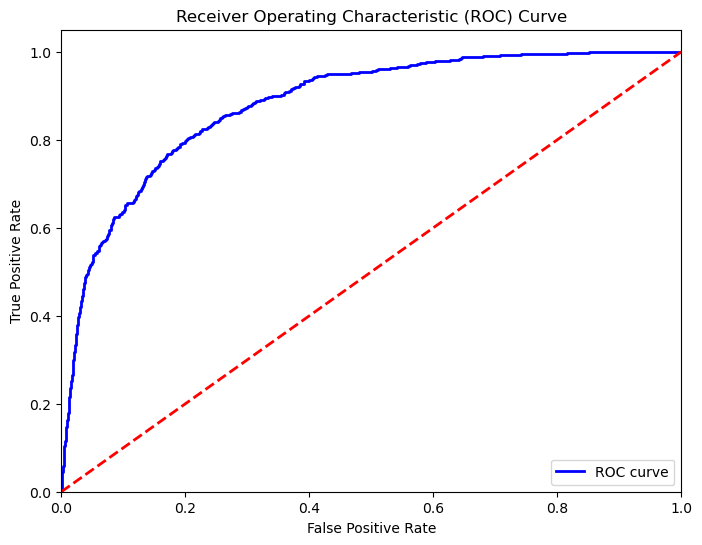

In [90]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [91]:
# Naive Bayes Classifier
# Define function
cat_nb = CategoricalNB(alpha = 1, min_categories=362) 

# Train the classifier 
cat_nb.fit(x_train_resampled, y_train_resampled) 

# Predict target variable and the probability
y_pred_nb = cat_nb.predict(x_test)
pred_prob = cat_nb.predict_proba(x_test)[:,1]

# Print train, test accuarcay and area under the curve score
print('Accuracy of naive bayes classifier on train set: ', cat_nb.score(x_train_resampled,y_train_resampled))
print('Accuracy of naive bayes classifier on test set: ', cat_nb.score(x_test, y_test))
print("AUC for NB regression:", roc_auc_score(y_test, pred_prob))

Accuracy of naive bayes classifier on train set:  0.6543907420013615
Accuracy of naive bayes classifier on test set:  0.6334144363341444
AUC for NB regression: 0.7028236673504384


In [92]:
# Evaluate confusion matrix
my_matrix_nb = confusion_matrix(y_test, y_pred_nb) #Modle evaluation
print("TP is:", my_matrix_nb[1,1])
print("TN is:", my_matrix_nb[0,0])
print("FP is:", my_matrix_nb[0,1])
print("FN is:", my_matrix_nb[1,0])

TP is: 419
TN is: 1924
FP is: 1153
FN is: 203


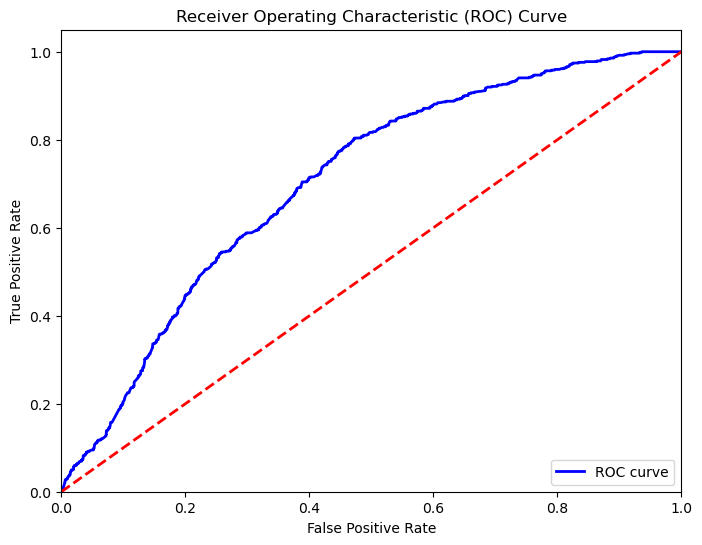

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [94]:
# Decision Tree
# Define function
opt_tree = DecisionTreeClassifier(random_state = 0) # here, impurity measure is default, Gini. more efficient

# Multiple hyperparameters to tune. separate elements by ,
# Go through all possible combinations: 9*9*9 models, with 5 fold cv??
# Define parameters
dt_params = {'max_depth':  range(1,10)         ,
             'min_samples_split':   range(2,11), 
             'max_leaf_nodes':    range(2,10)   }

# Create function with gridsearch and cross validation
grid_tree = GridSearchCV(opt_tree, dt_params, scoring = 'roc_auc')

# Train classifier
grid_tree.fit(x_train_resampled, y_train_resampled)

# Predict target variable and the probability
y_pred_dt = grid_tree.predict(x_test)
pred_prob = grid_tree.predict_proba(x_test)[:,1]

# Print train, test accuarcay and area under the curve score
print('Accuracy of Decision Tree classifier on train set: ', grid_tree.score(x_train_resampled,y_train_resampled))
print('Accuracy of Decision Tree classifier on test set: ', grid_tree.score(x_test, y_test))
print("AUC for Decision Tree:", roc_auc_score(y_test, pred_prob))
print("Accuracy:", grid_tree.best_score_) #mean validation accuracy
print(grid_tree.best_params_)

Accuracy of Decision Tree classifier on train set:  0.9222552492839305
Accuracy of Decision Tree classifier on test set:  0.9112210498596057
AUC for Decision Tree: 0.9112210498596057
Accuracy: 0.9197221821895761
{'max_depth': 4, 'max_leaf_nodes': 9, 'min_samples_split': 2}


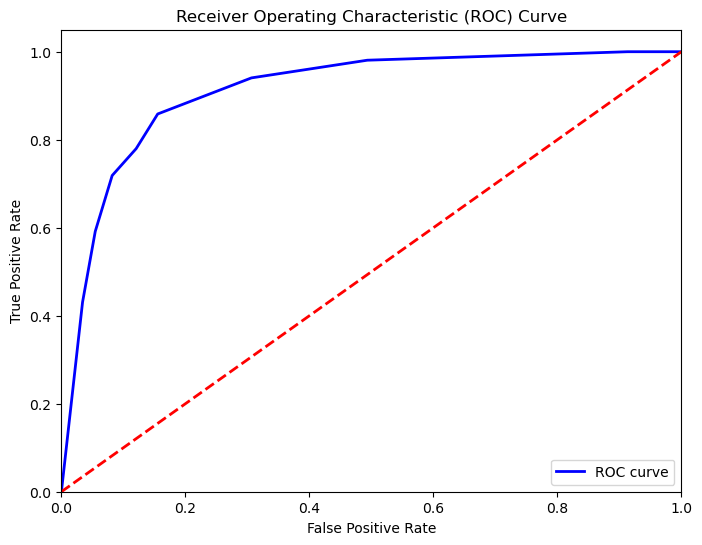

In [98]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [95]:
print(grid_tree.best_estimator_.score(x_test, y_test))

0.8469856718031901


In [96]:
# Evaluate confusion matrix
my_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("TP is:", my_matrix_dt[1,1])
print("TN is:", my_matrix_dt[0,0])
print("FP is:", my_matrix_dt[0,1])
print("FN is:", my_matrix_dt[1,0])

TP is: 534
TN is: 2599
FP is: 478
FN is: 88


In [68]:
print(tree.export_text(grid_tree.best_estimator_)) 

|--- feature_8 <= 0.00
|   |--- feature_18 <= 0.50
|   |   |--- feature_1 <= 0.00
|   |   |   |--- class: False
|   |   |--- feature_1 >  0.00
|   |   |   |--- feature_17 <= 0.50
|   |   |   |   |--- class: False
|   |   |   |--- feature_17 >  0.50
|   |   |   |   |--- class: False
|   |--- feature_18 >  0.50
|   |   |--- feature_4 <= 0.07
|   |   |   |--- class: False
|   |   |--- feature_4 >  0.07
|   |   |   |--- class: True
|--- feature_8 >  0.00
|   |--- feature_6 <= 0.00
|   |   |--- class: True
|   |--- feature_6 >  0.00
|   |   |--- feature_18 <= 0.50
|   |   |   |--- feature_8 <= 0.03
|   |   |   |   |--- class: True
|   |   |   |--- feature_8 >  0.03
|   |   |   |   |--- class: True
|   |   |--- feature_18 >  0.50
|   |   |   |--- class: True



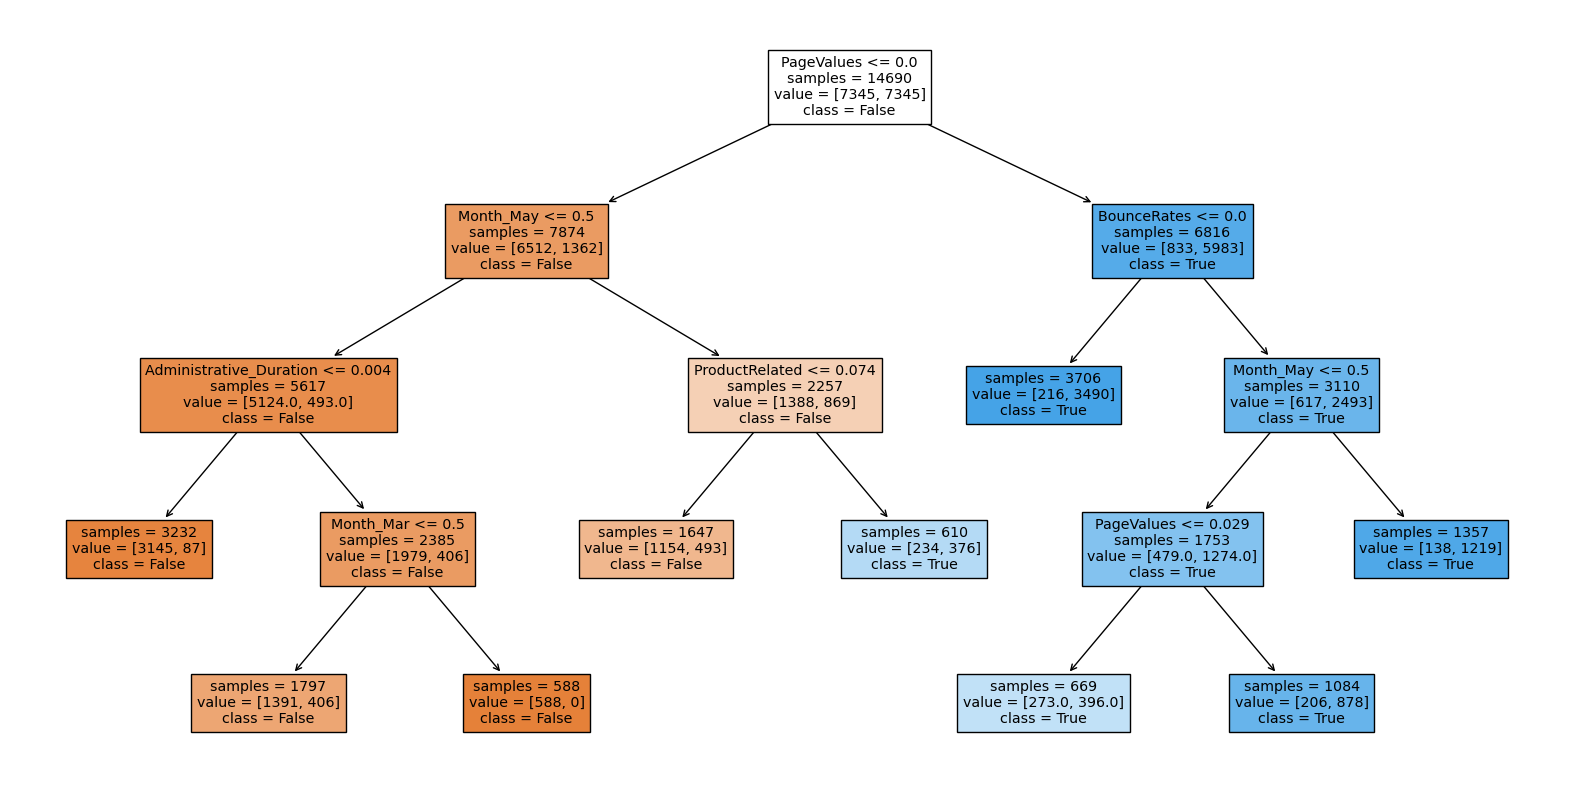

In [97]:
# Plot the decision tree
from sklearn import tree
fig = plt.figure(figsize=(20,10)) 
class_names = df['Revenue'].astype(str).unique().tolist()
tree.plot_tree(grid_tree.best_estimator_, 
               feature_names = data.columns.tolist(), # specify variable names 
               class_names = class_names, # specify class (Y) names
               filled = True, impurity = False) # whether to color the boxes, whether to report gini index
             #   fontsize = 12) # set fontsize to read # impurity = False means we don't need the IG or Gini
plt.show()

In [99]:
# Random Forest

rf = RandomForestClassifier(bootstrap=True, random_state = 42) 
dt_params_3 = {'n_estimators':np.arange(100,800,100),'max_samples':np.arange(100,800,100)}
grid_rf_tree = GridSearchCV(rf, dt_params_3,cv=5, scoring='roc_auc', n_jobs=2)
grid_rf_tree.fit(x_train_resampled, y_train_resampled)
# estimator dropped, estimator will be tree
y_pred_rf = grid_rf_tree.predict(x_test)
print('Accuracy of random forest classifier on train set: ', grid_rf_tree.score(x_train_resampled, y_train_resampled))
print('Accuracy of random forest classifier on test set: ', grid_rf_tree.score(x_test, y_test))
pred_prob = grid_rf_tree.predict_proba(x_test)[:,1]
print("AUC for random forest classifier:", roc_auc_score(y_test, pred_prob))


Accuracy of random forest classifier on train set:  0.9707447261558481
Accuracy of random forest classifier on test set:  0.9210627652315124
AUC for random forest classifier: 0.9210627652315124


In [100]:
my_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("TP is:", my_matrix_rf[1,1])
print("TN is:", my_matrix_rf[0,0])
print("FP is:", my_matrix_rf[0,1])
print("FN is:", my_matrix_rf[1,0])

TP is: 522
TN is: 2661
FP is: 416
FN is: 100


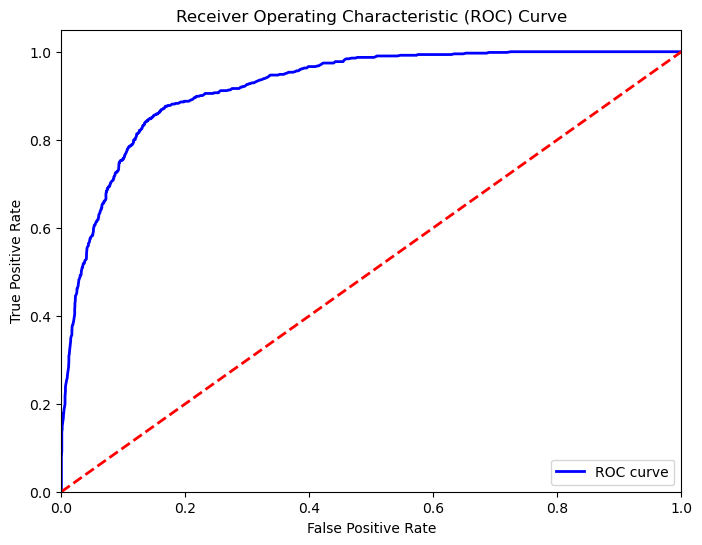

In [101]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [102]:
# Adaboost Ensemble Classifier 

dt1 = DecisionTreeClassifier(max_depth = 1, random_state = 42)
dt_params2 = {'learning_rate':  np.arange(0,1.1,0.1)}
adaboost = AdaBoostClassifier(dt1, n_estimators = 500, random_state = 42)
grid_ada_tree = GridSearchCV(adaboost, dt_params2,cv=5,n_jobs=2)
grid_ada_tree.fit(x_train_resampled, y_train_resampled)


y_pred_ada=grid_ada_tree.predict(x_test)
pred_prob = grid_ada_tree.predict_proba(x_test)[:,1]

# Print train, test accuarcay and area under the curve score
print('Accuracy of adaboost classifier on train set: ', grid_ada_tree.score(x_train_resampled, y_train_resampled))
print('Accuracy of adaboost classifier on test set: ', grid_ada_tree.best_estimator_.score(x_test, y_test))
print("AUC for Adaboost:", roc_auc_score(y_test, pred_prob))
print("Best learning rate:", grid_ada_tree.best_params_)

/Users/maddy16/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/maddy16/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/maddy16/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/maddy16/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Accuracy of adaboost classifier on train set:  0.8663036078965283
Accuracy of adaboost classifier on test set:  0.8556366585563666
AUC for Adaboost: 0.8941958123072647
Best learning rate: {'learning_rate': 1.0}


In [113]:
print("AUC for random adaboost classifier:", roc_auc_score(y_test, pred_prob))
# Evaluate confusion matrix
my_matrix_adaboost = confusion_matrix(y_test, y_pred_ada)
print("TP is:", my_matrix_adaboost[1,1])
print("TN is:", my_matrix_adaboost[0,0])
print("FP is:", my_matrix_adaboost[0,1])
print("FN is:", my_matrix_adaboost[1,0])

AUC for random adaboost classifier: 0.8941958123072647
TP is: 479
TN is: 2686
FP is: 391
FN is: 143


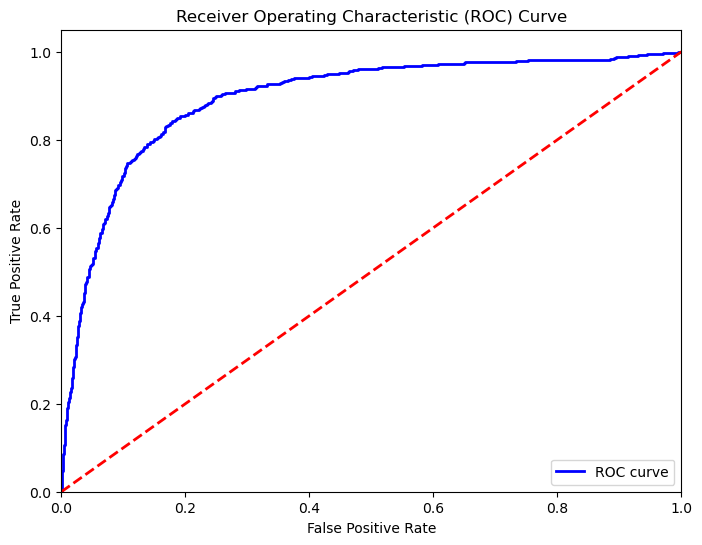

In [104]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [105]:
# Linear SVM with GridSearchCV

lr_svc = LinearSVC(random_state = 0, max_iter=10000)
params_svc = {'C': [0.01, 0.1, 1, 10]}
grid_lrsvc = GridSearchCV(lr_svc, params_svc, scoring = 'roc_auc', n_jobs = 2 )
grid_lrsvc.fit(x_train_resampled, y_train_resampled)
y_pred_lrsvc=grid_lrsvc.predict(x_test)
#pred_prob = grid_lrsvc.predict_proba(x_test)[:,1]
print('Accuracy of linear SVC on train set: ', grid_lrsvc.score(x_train_resampled, y_train_resampled))
print('Accuracy of linear SVC on test set: ', grid_lrsvc.score(x_test, y_test))
#print("AUC for linear SVC:", roc_auc_score(y_test, pred_prob))
print("Best parameter 'C':", grid_lrsvc.best_params_)

/Users/maddy16/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/maddy16/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/maddy16/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/maddy16/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/maddy16/a

Accuracy of linear SVC on train set:  0.9112612507825676
Accuracy of linear SVC on test set:  0.8890727490655177
Best parameter 'C': {'C': 10}


In [114]:
print(grid_lrsvc.best_estimator_.score(x_test, y_test)) #with scoring method as accuracy of best model
print("Best parameter 'C':", grid_lrsvc.best_params_) #with scoring method as auc
#can not find AUC score as SVC doesnot have prodict proba, so we use decision_scores
print("Mean validation Accuracy:", grid_lrsvc.best_score_)
decision_scores = grid_lrsvc.decision_function(x_test)
auc_score = roc_auc_score(y_test, decision_scores)
print("AUC score:", auc_score)

0.838875371722087
Best parameter 'C': {'C': 10}
Mean validation Accuracy: 0.9091678672598811
AUC score: 0.8890727490655177


In [107]:
my_matrix_lrsvc = confusion_matrix(y_test, y_pred_lrsvc)
print("TP is:", my_matrix_lrsvc[1,1])
print("TN is:", my_matrix_lrsvc[0,0])
print("FP is:", my_matrix_lrsvc[0,1])
print("FN is:", my_matrix_lrsvc[1,0])

TP is: 462
TN is: 2641
FP is: 436
FN is: 160


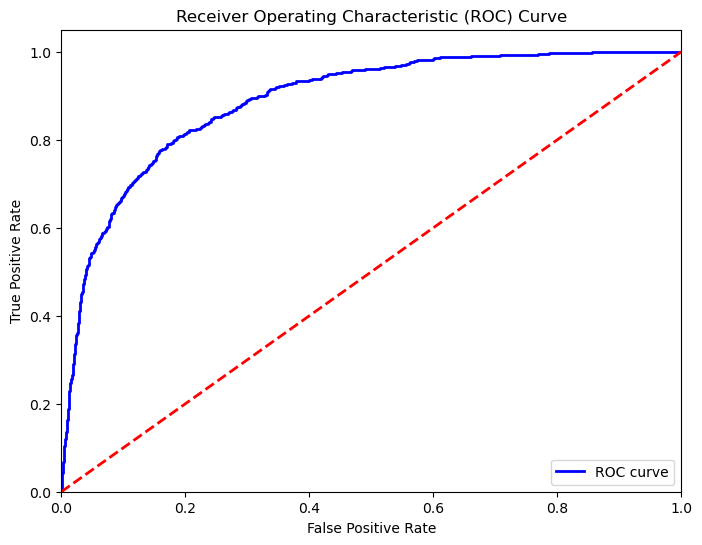

In [111]:
from sklearn.metrics import roc_auc_score, roc_curve
decision_scores = grid_lrsvc.decision_function(x_test)#Get the decision scores (signed distances to the hyperplane)
fpr, tpr, thresholds = roc_curve(y_test, decision_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [112]:
# Kernal SVM with GridSearchCV

svc = SVC(random_state = 0, kernel = 'rbf')
param_svc_kernel = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 10000]  ,
                    'gamma': [0.0001, 0.001,0.001,0.1,1,10]     }
grid_svc = GridSearchCV(svc, param_svc_kernel, cv = 5, scoring = 'roc_auc', n_jobs=2)
grid_svc.fit(x_train_resampled, y_train_resampled)
y_pred_kernel = grid_svc.predict(x_test)
print('Accuracy for kernel SVM on train set:',grid_svc.score(x_train_resampled, y_train_resampled))
print('Accuracy for kernel SVM on test set:',grid_svc.score(x_test, y_test))
print("Best parameters:", grid_svc.best_params_)

Accuracy for kernel SVM on train set: 0.9981289374553108
Accuracy for kernel SVM on test set: 0.6121041708683971
Best parameters: {'C': 10, 'gamma': 10}


In [117]:
print(grid_svc.best_estimator_.score(x_test, y_test)) #based on accuracy
print("Best parameter:", grid_lrsvc.best_params_) #with scoring method as accuracy of best model
print("Accuracy:", grid_svc.best_score_) #mean validation accuracy, should go with which ever has heighest of it
decision_scores = grid_svc.decision_function(x_test)

# Calculate AUC using decision scores
auc_score = roc_auc_score(y_test, decision_scores)
print("AUC score:", auc_score)

0.7996755879967559
Best parameter: {'C': 10}
Accuracy: 0.9845320652226801
AUC score: 0.6121041708683971


In [118]:
my_matrix_kernel = confusion_matrix(y_test, y_pred_kernel)
print("TP is:", my_matrix_kernel[1,1])
print("TN is:", my_matrix_kernel[0,0])
print("FP is:", my_matrix_kernel[0,1])
print("FN is:", my_matrix_kernel[1,0])

TP is: 125
TN is: 2833
FP is: 244
FN is: 497


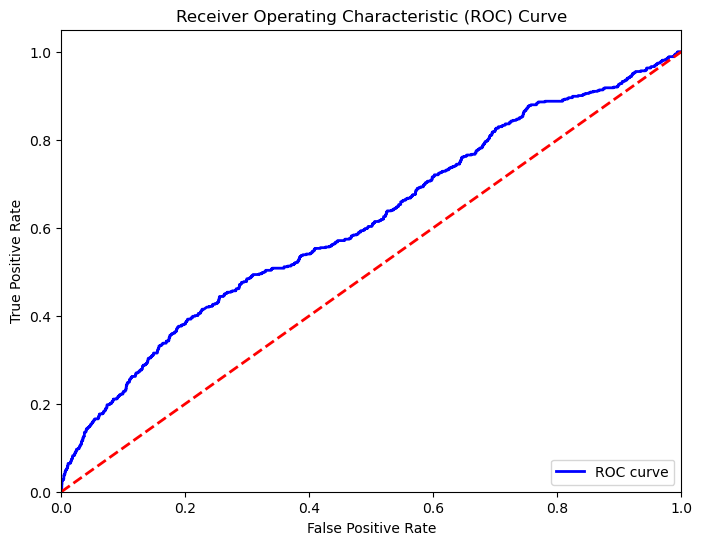

In [146]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, decision_scores)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [124]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import numpy as np

# Define and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,60,20), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(x_train_resampled, y_train_resampled)

# Predict on the test data
y_pred_mlp = mlp.predict(x_test)
pred_prob = mlp.predict_proba(x_test)[:, 1]

# Calculate accuracy and AUC score
accuracy = accuracy_score(y_test, y_pred_mlp)
auc_score = roc_auc_score(y_test, pred_prob)

print("Test Accuracy:", accuracy)
print("AUC for nn:", auc_score)




Test Accuracy: 0.8432008650986753
AUC for nn: 0.8317007106976666


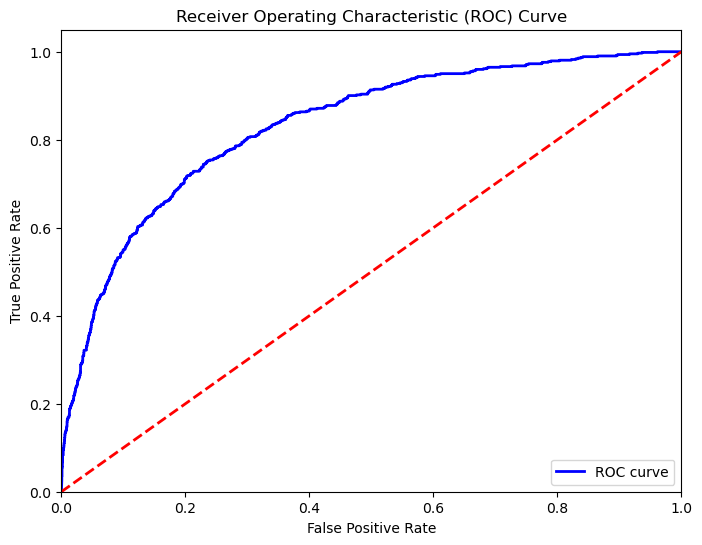

In [144]:
from sklearn.metrics import roc_curve, auc

# Calculate FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [126]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_mlp)
tn, fp, fn, tp = cm.ravel()
print("Confusion Matrix:")
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

Confusion Matrix:
TN: 2788
FP: 289
FN: 291
TP: 331


In [136]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score

# Define a pipeline with PCA and Random Forest
pipe_rf_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3)),  # Adjust the number of components as needed
    ('rf', RandomForestClassifier(bootstrap=True, random_state=42))
])

# Define parameters to search
param_grid_rf_pca = {
    'rf__n_estimators': np.arange(100, 800, 100),
    'rf__max_samples': np.arange(100, 800, 100)
}

# Perform grid search
grid_rf_pca = GridSearchCV(pipe_rf_pca, param_grid_rf_pca, cv=5, scoring='roc_auc', n_jobs=2)
grid_rf_pca.fit(x_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_rf_pca = grid_rf_pca.predict(x_test)
pred_prob_rf_pca = grid_rf_pca.predict_proba(x_test)[:, 1]

# Print the results
print('Accuracy of Random Forest classifier with PCA on train set:', grid_rf_pca.score(x_train_resampled, y_train_resampled))
print('Accuracy of Random Forest classifier with PCA on test set:', grid_rf_pca.score(x_test, y_test))
print("AUC for Random Forest classifier with PCA:", roc_auc_score(y_test, pred_prob_rf_pca))


Accuracy of Random Forest classifier with PCA on train set: 0.8905110889399763
Accuracy of Random Forest classifier with PCA on test set: 0.737210367972312
AUC for Random Forest classifier with PCA: 0.737210367972312


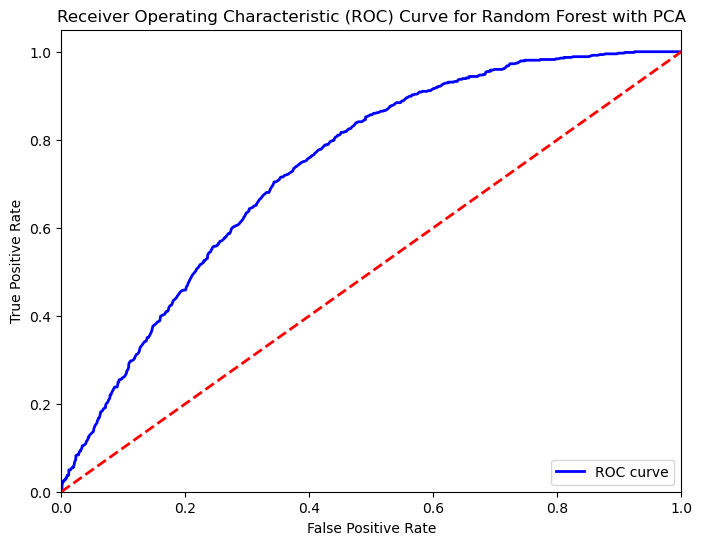

In [145]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate FPR and TPR
fpr_rf_pca, tpr_rf_pca, thresholds_rf_pca = roc_curve(y_test, pred_prob_rf_pca)



# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_pca, tpr_rf_pca, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest with PCA')
plt.legend(loc='lower right')
plt.show()

